<a href="https://colab.research.google.com/github/Mehranmollanorozi/Cats_dogs-detection-_-CNN/blob/main/Dogs_Cats___CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehranmollanorozi","key":"2c000a9cd4bc430afc586ae410d12035"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download karakaggle/kaggle-cat-vs-dog-dataset

Dataset URL: https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset
License(s): unknown
100% 787M/787M [00:24<00:00, 44.0MB/s]
100% 787M/787M [00:24<00:00, 33.9MB/s]


In [ ]:
!unzip /content/kaggle-cat-vs-dog-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/549.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5490.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5491.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5492.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5493.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5494.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5495.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5496.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5497.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5498.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5499.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/55.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/550.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5500.jpg  
  inflating: kagglecats

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/animals/PetImages'


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    validation_split=0.2
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

Found 19968 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary',
    subset='validation'
)


Found 4991 images belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(0.001), input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])



In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)

# کامپایل مدل
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# نمایش خلاصه مدل
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 126, 126, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 61, 61, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,219,201 (50.43 MB)

 Trainable params: 13,217,793 (50.42 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 173s 524ms/step - accuracy: 0.5811 - loss: 1.7329 - val_accuracy: 0.5436 - val_loss: 1.8947
Epoch 2/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 162s 520ms/step - accuracy: 0.6031 - loss: 1.6081 - val_accuracy: 0.6343 - val_loss: 1.5244
Epoch 3/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 162s 518ms/step - accuracy: 0.6227 - loss: 1.5596 - val_accuracy: 0.6698 - val_loss: 1.4840
Epoch 4/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 161s 515ms/step - accuracy: 0.6397 - loss: 1.5132 - val_accuracy: 0.6796 - val_loss: 1.4678
Epoch 5/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 164s 527ms/step - accuracy: 0.6612 - loss: 1.4731 - val_accuracy: 0.6977 - val_loss: 1.4435
Epoch 6/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 163s 522ms/step - accuracy: 0.6563 - loss: 1.4538 - val_accuracy: 0.7011 - val_loss: 1.4151
Epoch 7/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 164s 525ms/step - accuracy: 0.6689 - loss: 1.4161 - val_accuracy: 0.6987 - val_loss: 1.3791
Epoch 8/30
312/312 ━━━━━━━━━━━━━━━━━━━━ 163s 523ms/step - accuracy: 0.6717 -

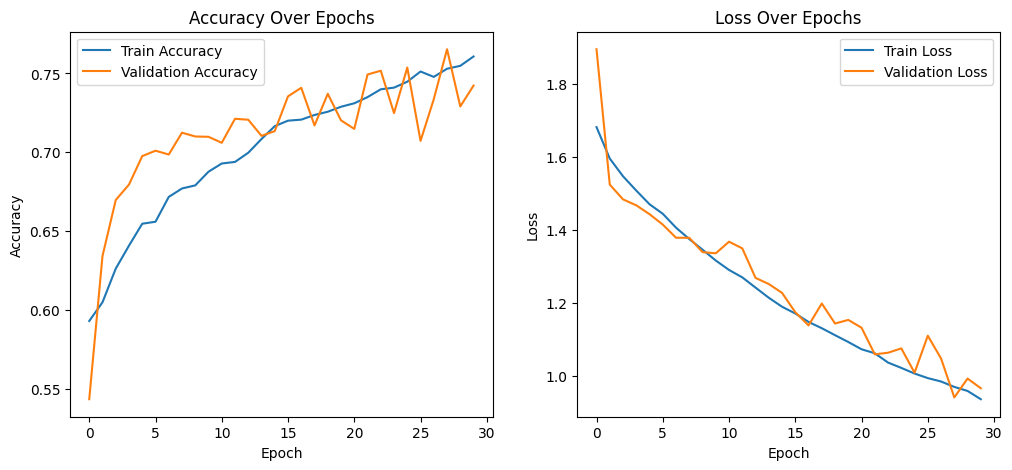

In [ ]:
plt.figure(figsize=(12, 5))

# نمودار دقت
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# نمودار خطا
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("🐶 سگ شناسایی شد!")
    else:
        print("🐱 گربه شناسایی شد!")

# مسیر تصویر تست
test_image_path = "/content/Cat 2.jpg"
predict_image(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
🐱 گربه شناسایی شد!
